In [1]:
"""

import graphviz 
import pydotplus

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

filename = 'Churn_Modelling.csv'

data = pd.read_csv(filename, header='infer')

In [2]:
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

In [3]:
#---SHUFFLING DATA---
data = data.reindex(np.random.permutation(data.index))
data.reset_index(inplace=True, drop=True)

#---ONE HOT ENCODING---
one_hot = pd.get_dummies(data['Geography'])
one_hot2 = pd.get_dummies(data['Gender'])
df = data.drop(['Geography', 'Gender'],axis = 1)
df = df.join(one_hot)
df = df.join(one_hot2)

#---NORMALIZE---
normalize_numeric_minmax(df,'CreditScore')
normalize_numeric_minmax(df,'Age')
normalize_numeric_minmax(df,'Balance')
normalize_numeric_minmax(df,'EstimatedSalary')
normalize_numeric_minmax(df,'Tenure')
normalize_numeric_minmax(df,'NumOfProducts')

#---SPLIT THE DATA---
numInstances = 10000
numTrain = 2000
numTest = numInstances - numTrain

trainingData = df[:numTest]
testData = df[numTest:]
testData.reset_index(inplace=True, drop=True)
# drop useless columns
trainX = trainingData.drop(['RowNumber', 'CustomerId','Surname'] ,axis=1)
testX = testData.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'] ,axis=1)

testY = pd.DataFrame(testData, columns=['Exited'])

C:\Users\Talal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]


C:\Users\Talal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]


C:\Users\Talal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]


C:\Users\Talal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]


C:\Users\Talal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]


C:\Users\Talal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]


C:\Users\Talal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 1 0]


C:\Users\Talal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 1 0]


C:\Users\Talal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 1 0]


C:\Users\Talal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 1 0]


C:\Users\Talal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 1 0]


Text(0, 0.5, 'Accuracy')

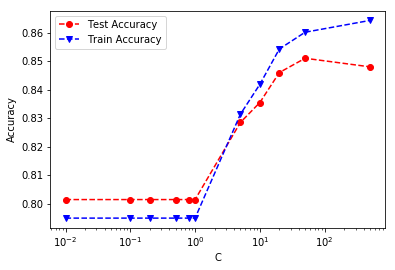

In [4]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50, 500]

SVMLtestAcc = []
SVMLtrainAcc = []
Y = pd.DataFrame(trainX, columns=['Exited'])
X = trainX.drop(['Exited'],axis=1)

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X,Y)
    svml_pred = clf.predict(testX)
    svml_pred_train = clf.predict(X)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(testY, svml_pred))
    SVMLtrainAcc.append(accuracy_score(Y,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

In [7]:
#---Naive Bayes---
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(X,Y)
NB_pred = clf_NB.predict(testX)
print(NB_pred)

print('Accuracy on test data is %.2f' % (accuracy_score(testY, NB_pred)))

[0 0 0 ... 0 1 0]
Accuracy on test data is 0.82


C:\Users\Talal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
